In [1]:
#Library Imports
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [4]:
#Initial Parameters
xmax=10.0
nx=200
dx=xmax/(nx-1)
x=np.linspace(0,xmax,nx)

#Initialization of sin function
l=20*dx
k=2*np.pi/l
f=np.sin(k*x)

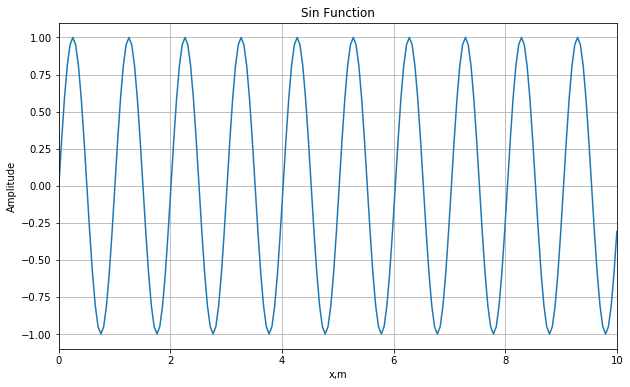

In [11]:
#Plot sin function
plt.figure(figsize=(10,6))
plt.plot(x,f)
plt.title('Sin Function')
plt.xlabel('x,m')
plt.ylabel('Amplitude')
plt.xlim((0,xmax))
plt.grid()
plt.show()

In [15]:
#First derivative with two points
#Initialization of numerical and analytical solution
fdashn=np.zeros(nx)
fdasha=np.zeros(nx)

#Numerical derivative of given function
for i in range(1,nx-1):
    fdashn[i]=(f[i+1]-f[i-1])*0.5/dx

#Analytical derivative of given function
fdasha=k*np.cos(k*x)

#excluding zeros
fdasha[0]=0.0
fdasha[nx-1]=0.0

#Error (rms)
rms=np.sqrt(np.mean(fdashn-fdasha)**2)

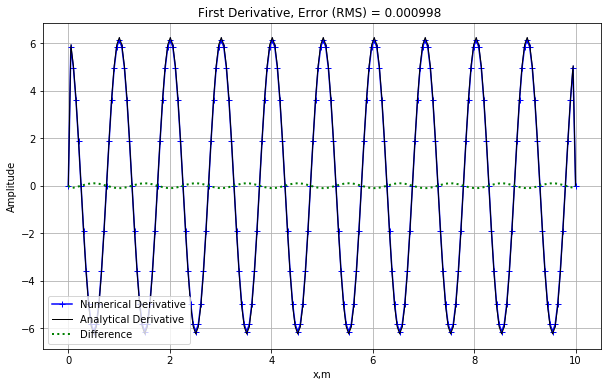

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x, fdashn, label="Numerical Derivative", marker="+", color="blue")
plt.plot(x, fdasha, label="Analytical Derivative",lw=1,ls="-",color="black")
plt.plot(x, fdashn-fdasha, label="Difference",lw=2,ls=":",color="green")
plt.title("First Derivative, Error (RMS) = %.6f " %(rms))
plt.xlabel('x,m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

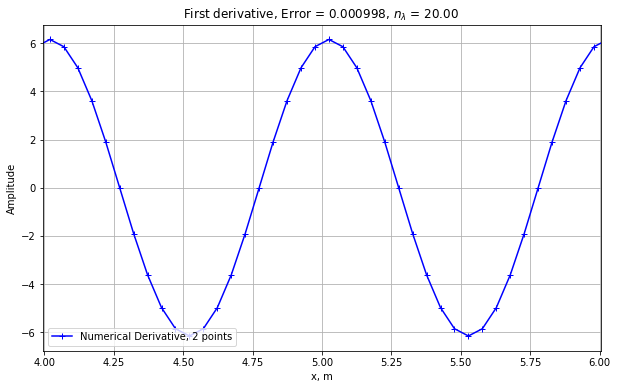

In [21]:
# Plotting number of points per wavelength
plt.figure(figsize=(10,6))
plt.plot (x, fdashn,label="Numerical Derivative, 2 points", marker='+', color="blue")
plt.title("First derivative, Error = %.6f, $n_\lambda$ = %.2f " % ( rms, l/dx) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.xlim((xmax/2-l,xmax/2+l))
plt.grid()
plt.show()    

In [26]:
#Define range of number of points, loop over the points
nmin=3 
nmax=16
na=np.zeros(nmax-nmin) #vector with number of points per wavelength
err=np.zeros(nmax-nmin) #vector with error

j=-1 #starting index of array

for n in range(nmin,nmax):
    j=j+1
    na[j]=n
    l=na[j]*dx
    k=2*pi/l
    f=np.sin(k*x)
    
    for i in range(1,nx-1):
        fdashn[i]=(f[i+1]-f[i-1])*0.5/dx
    
    fdasha=k*np.cos(k*x)
    fdasha[0]=0;
    fdasha[nx-1]=0;
    
    node=np.int(nx/2)
    err[j]=(fdasha[node]-fdashn[node])**2/fdasha[node]**2 * 100


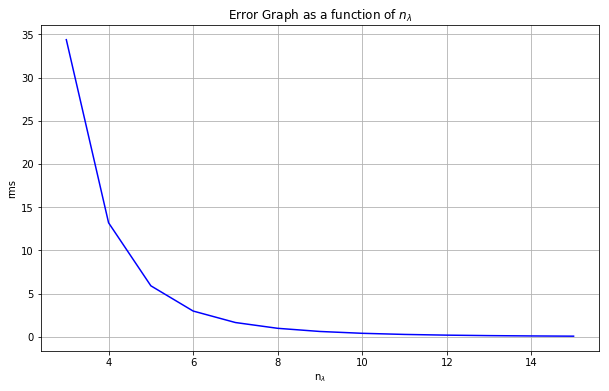

In [29]:
plt.figure(figsize=(10,6))
plt.plot(na,err,ls='-',color="blue")
plt.title('Error Graph as a function of $n_\lambda$')
plt.xlabel('n$_\lambda$')
plt.ylabel('rms')
plt.grid()
plt.show()